In [13]:
import numpy as np
from PIL import Image
from skimage.transform import resize
import matplotlib.pyplot as plt
import cv2



def preprocess_image_for_digit_recognition(uploaded_image):
    # Convert PIL Image to a NumPy array
    image_array = np.array(uploaded_image)
    
    # Convert to grayscale
    if len(image_array.shape) == 3:  # Check if the image is colored (3 channels)
        image = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
    else:
        image = image_array  # The image is already in grayscale

    # Thresholding the image to get a binary image
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours and the bounding rectangle
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        cnt = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(cnt)
        
        # Crop and resize the image around the digit
        digit = binary_image[y:y+h, x:x+w]
        resized_digit = cv2.resize(digit, (20, 20), interpolation=cv2.INTER_AREA)
        
        # Create a 28x28 image and place the digit in the center
        final_image = np.zeros((28, 28), dtype=np.uint8)
        final_image[4:24, 4:24] = resized_digit
    else:
        # If no contours are found, just resize the image
        final_image = cv2.resize(binary_image, (28, 28), interpolation=cv2.INTER_AREA)

    # Reshape the final image to a one-dimensional array of 784 elements
    flattened_image = final_image.reshape(-1)
    
    return flattened_image
    




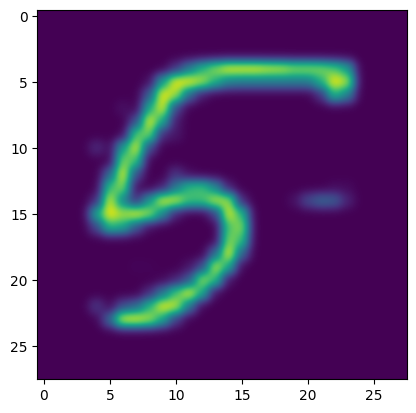

In [59]:
image_path = '/home/thor_01/Documents/EC/ensemble-learning-sklearn/digits/Screenshot from 2024-03-21 17-45-55.png'
image = Image.open(image_path)
digit_image = preprocess_image_for_digit_recognition(image)
#sample = preprocess_image(digit_image)
plt.imshow(digit_image.reshape(28, 28), interpolation="gaussian")

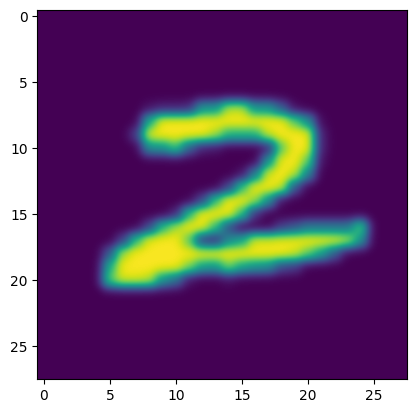

In [55]:
plt.imshow(X[199].reshape(28, 28), interpolation="gaussian")

In [60]:
import joblib
# Load the trained model
model = joblib.load('/home/thor_01/Documents/EC/ensemble-learning-sklearn/trained_models/svm_clf_final.joblib')
model_2 = joblib.load('/home/thor_01/Documents/EC/ensemble-learning-sklearn/trained_models/svm_clf_final_augmented.joblib')

In [61]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

/home/thor_01/miniconda3/envs/ds2023/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [50]:
X[0].shape

(784,)

In [49]:
digit_image

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  36, 103, 165, 216, 255, 255, 255, 244,
       239, 219, 219, 212, 188, 143,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   8, 139, 255, 255, 229, 163, 111, 104,
       104, 104, 104, 104, 104, 159, 255, 229,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  71, 255, 227,  87,  1

In [56]:
digit_image = X[199]

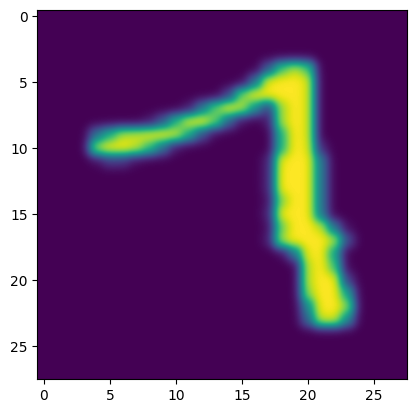

In [66]:
image_path = '/home/thor_01/Documents/EC/ensemble-learning-sklearn/digits/Screenshot from 2024-03-21 16-43-03.png'
image = Image.open(image_path)
digit_image = preprocess_image_for_digit_recognition(image)
#sample = preprocess_image(digit_image)
plt.imshow(digit_image.reshape(28, 28), interpolation="gaussian")

In [67]:
# Ensure digit_image is reshaped correctly for a single sample

# digit_image= X[0]
digit_image_reshaped = digit_image.reshape(1, -1)

# Predict the class of the digit
prediction = model.predict(digit_image_reshaped)
probability = model.predict_proba(digit_image_reshaped).max()

print(f"Prediction: {prediction[0]}, Probability: {probability}")

Prediction: 7, Probability: 0.2611394928899848


In [68]:

digit_image_reshaped = digit_image.reshape(1, -1)

# Predict the class of the digit
prediction = model_2.predict(digit_image_reshaped)
#probability = model_2.predict_proba(digit_image_reshaped).max()

print(f"Prediction: {prediction[0]}, Probability: {probability}")

Prediction: 0, Probability: 0.2611394928899848


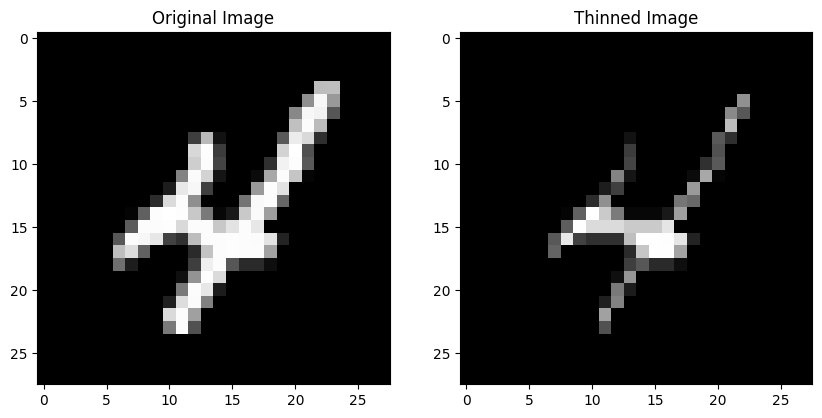

In [40]:
import cv2
import numpy as np

def thin_out_digits(image, iterations=1):
    """
    Thins out the digits in a given MNIST image using erosion.

    Parameters:
    image (numpy.ndarray): The input image containing a digit.
    iterations (int): Number of times the erosion operation is applied.

    Returns:
    numpy.ndarray: The image with thinned digits.
    """
    # Define the erosion kernel size
    # A 3x3 kernel of ones is commonly used, but you might adjust based on your specific needs
    kernel = np.ones((3,3), np.uint8)
    
    # Apply the erosion operation
    thinned_image = cv2.erode(image, kernel, iterations=iterations)
    
    return thinned_image

# Example usage
# Assuming 'image' is a loaded MNIST image (as a 2D NumPy array)
# You might need to adjust 'iterations' depending on how thin you want the digits to be
thinned_image = thin_out_digits(image, iterations=1)

# Display the result or process further
# For example, using matplotlib to display
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image.reshape(28, 28), cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Thinned Image')
plt.imshow(thinned_image.reshape(28, 28), cmap='gray')

plt.show()